In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import BorderlineSMOTE, SMOTE

In [5]:
column_names = [f'Feature {i}' for i in range(1, 13)]

X = pd.read_csv('X_train.csv', names=column_names)
y = pd.read_csv('y_train.csv', names=['label'])

In [6]:
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
0,0.0,0.0,5.0,0.396389,5.012954,-3.703636,9.914642,9.312044,-3.998171,-0.106890,-0.832379,0.262956
1,2.0,0.0,4.0,0.220096,5.272624,-2.728059,8.627958,7.376389,-5.060494,0.257422,-1.150552,-0.168031
2,1.0,1.0,4.0,-0.250843,3.373986,-2.301601,8.962744,7.822342,-5.537257,-1.247614,-2.898554,-0.300639
3,1.0,0.0,1.0,0.119683,5.667558,-3.731859,10.441029,6.008806,-5.910984,-0.987030,-0.579501,-2.529101
4,0.0,1.0,8.0,2.303171,5.981023,-0.779678,11.779421,7.700222,-2.962406,-0.176767,-0.557307,-0.940115
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,1.0,3.0,0.733569,4.908632,-3.647848,10.711953,7.043084,-4.666825,-0.128470,-1.110226,-1.756828
1996,2.0,1.0,5.0,1.718876,4.749878,-2.570230,10.471740,7.097795,-2.818046,0.302948,0.036621,-0.222467
1997,0.0,1.0,3.0,1.661992,4.596748,-4.295628,10.502564,5.778713,-2.963224,-0.725809,-1.721564,-0.728306
1998,0.0,1.0,5.0,1.497571,4.532950,-3.609299,10.383600,6.143892,-3.848104,0.978862,-1.446905,-1.047692


In [7]:
X.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.615000,0.723000,3.990500,0.011784,5.079715,-3.033863,10.111603,7.087560,-5.045005,0.008941,0.020088,0.021068
std,0.662567,0.469448,2.000353,1.065861,1.169187,1.067607,1.478860,1.268624,1.194370,1.439701,1.174570,1.162282
min,0.000000,0.000000,0.000000,-4.359126,2.002630,-9.546477,6.521276,3.670496,-15.363759,-11.129174,-7.122610,-7.502306
25%,0.000000,0.000000,3.000000,-0.704354,4.370330,-3.684871,9.284869,6.344237,-5.713064,-0.735472,-0.668719,-0.666044
50%,1.000000,1.000000,4.000000,-0.009573,5.027926,-2.995193,9.984027,7.020403,-4.993382,0.019937,0.012109,0.033259
75%,1.000000,1.000000,5.000000,0.738247,5.700390,-2.331969,10.701340,7.663830,-4.298813,0.783787,0.725797,0.746406
max,4.000000,2.000000,13.000000,4.041289,13.774194,0.611350,23.698479,17.138482,-1.360340,10.673357,7.842676,4.888665


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature 1   2000 non-null   float64
 1   Feature 2   2000 non-null   float64
 2   Feature 3   2000 non-null   float64
 3   Feature 4   2000 non-null   float64
 4   Feature 5   2000 non-null   float64
 5   Feature 6   2000 non-null   float64
 6   Feature 7   2000 non-null   float64
 7   Feature 8   2000 non-null   float64
 8   Feature 9   2000 non-null   float64
 9   Feature 10  2000 non-null   float64
 10  Feature 11  2000 non-null   float64
 11  Feature 12  2000 non-null   float64
dtypes: float64(12)
memory usage: 187.6 KB


In [9]:
X.duplicated().sum()

0

In [10]:
df = X.copy()
df['label'] = y

Text(0.5, 1.02, 'Pair Plot of Features')

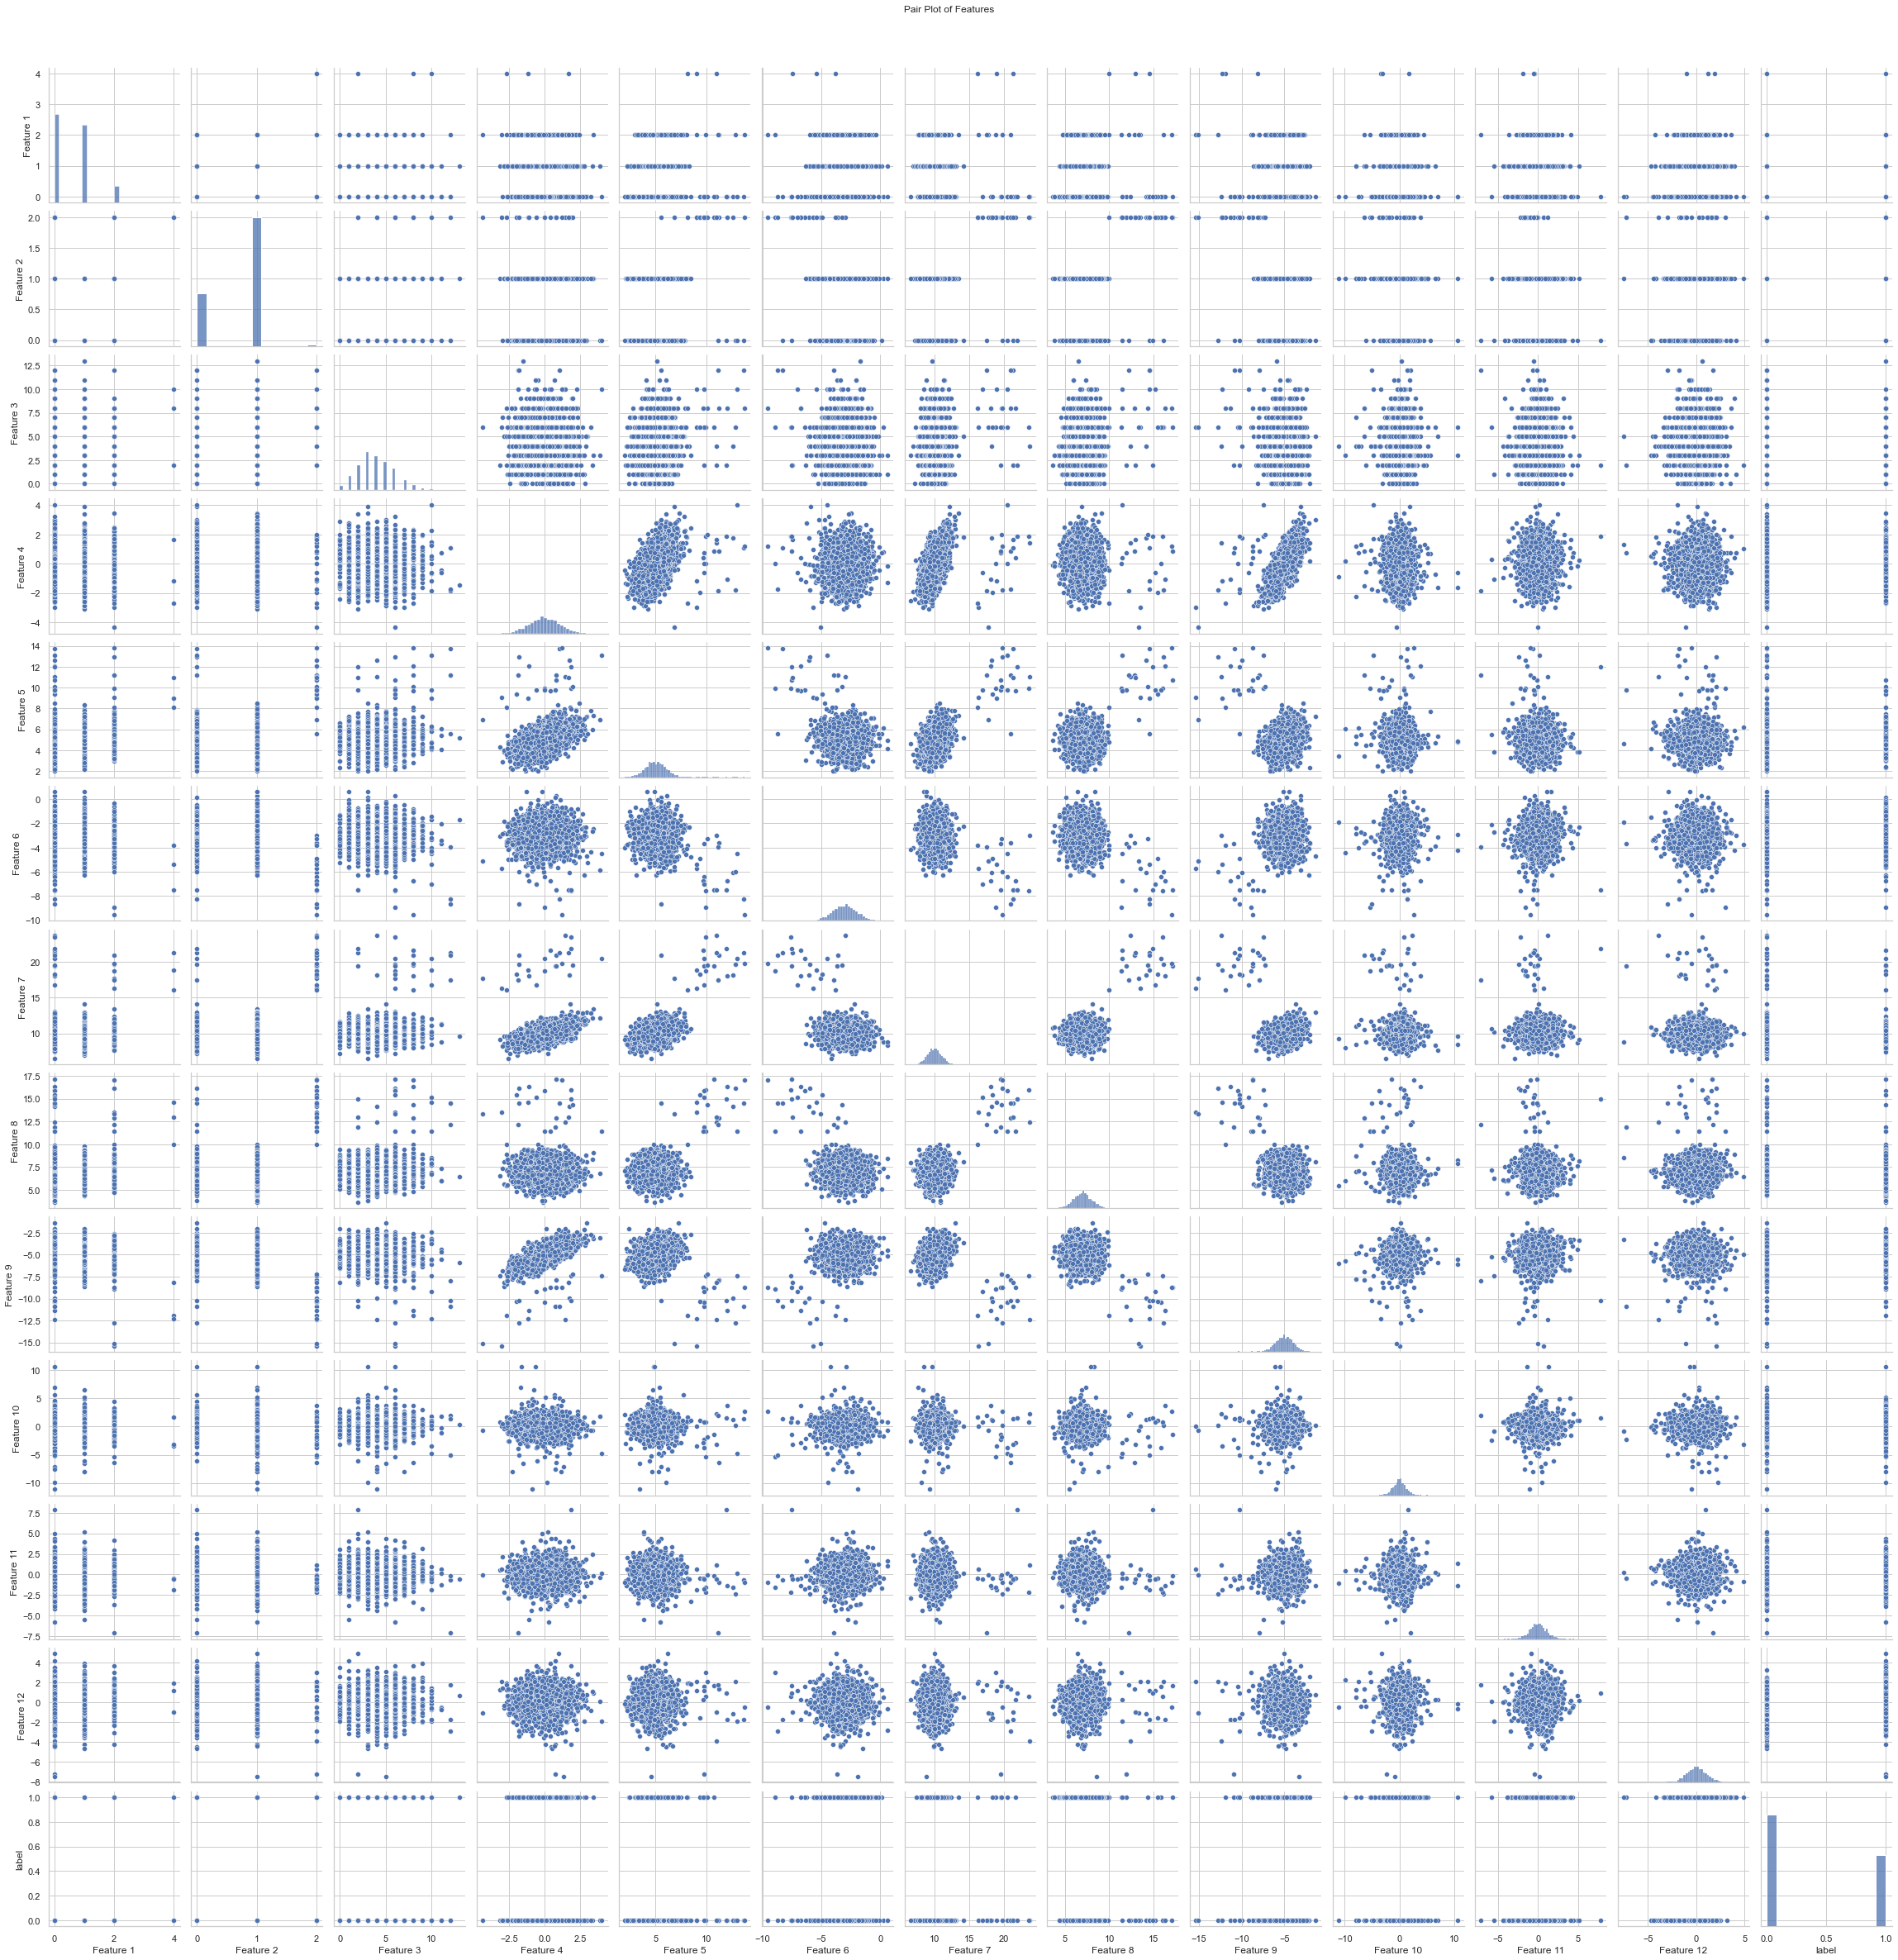

In [11]:
sns.set(style="whitegrid")

# Pair Plot
sns.pairplot(df)
plt.suptitle("Pair Plot of Features", y=1.02)

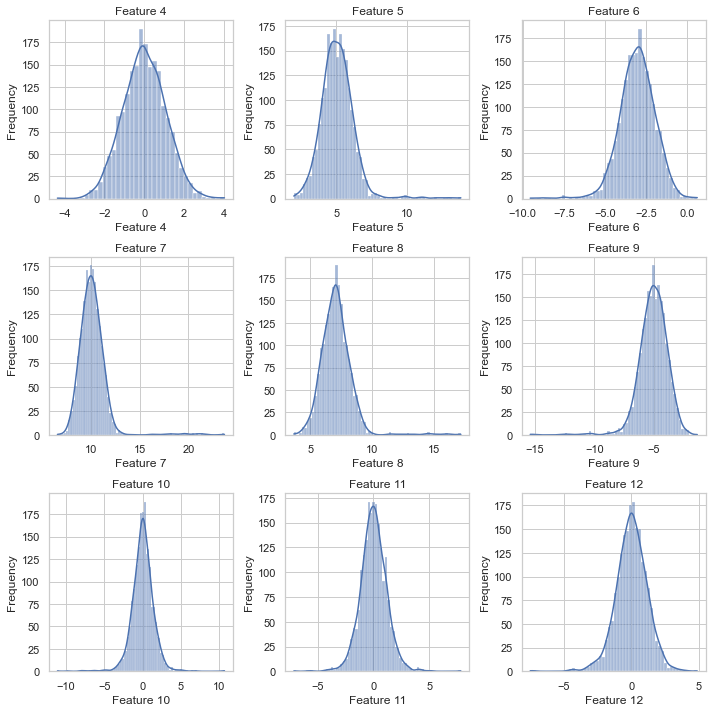

In [12]:
selected_columns = X.columns[3:] #9-ից ավել չեմ կարա, համ էլ առաջին 3 հետաքրքիր չեն

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Plot histograms with density curves
for i, column in enumerate(selected_columns):
    sns.histplot(X[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

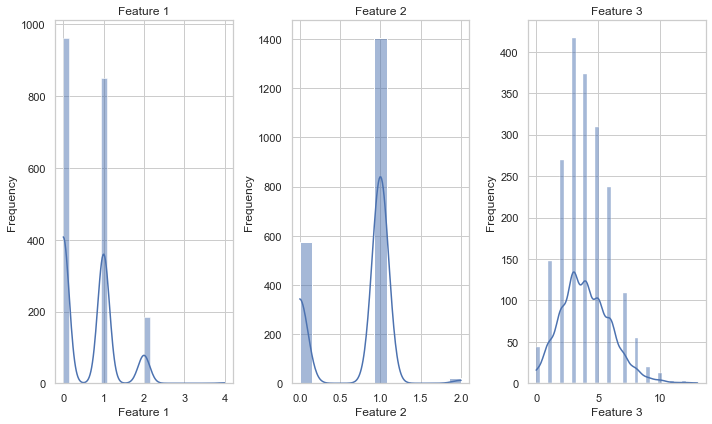

In [13]:
selected_columns = X.columns[0:3] #9-ից ավել չեմ կարա, համ էլ առաջին 3 հետաքրքիր չեն

fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes = axes.flatten()

# Plot histograms with density curves
for i, column in enumerate(selected_columns):
    sns.histplot(X[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

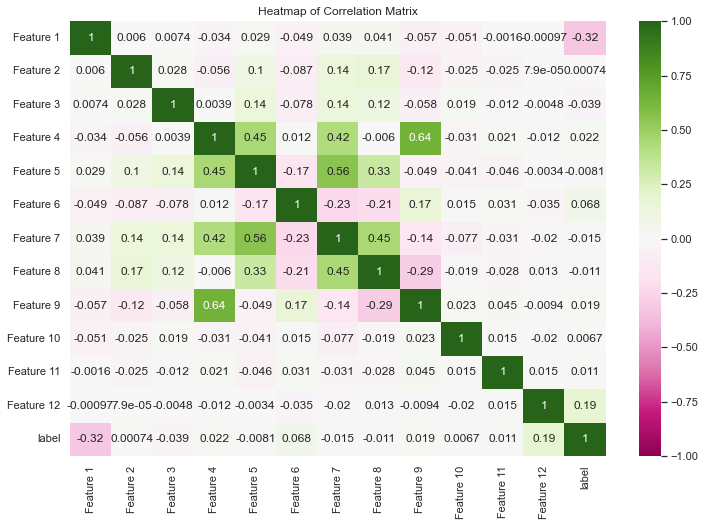

In [14]:
sns.set(style="whitegrid")

# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Heatmap of Correlation Matrix")

Text(0.5, 1.0, 'Distribution of Features')

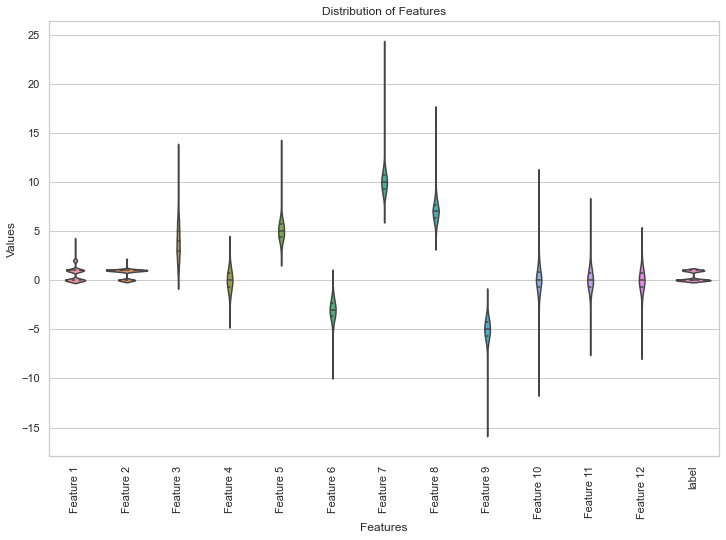

In [15]:
# Distribution Plot
X_train_melted = df.melt(var_name='Features', value_name='Values')
plt.figure(figsize=(12, 8))
sns.violinplot(x='Features', y='Values', data=X_train_melted, inner='quartile')
plt.xticks(rotation=90)
plt.title("Distribution of Features")

Text(0.5, 1.0, 'Box Plots of Features')

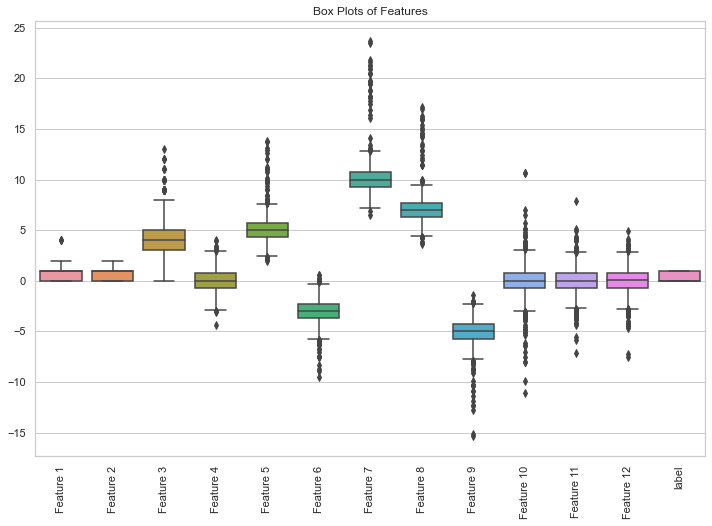

In [16]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plots of Features")

### Անենք որոշ հետևություններ
#### տեսնում ենք, որ կան outlier-ներ (վերջին plot հատկապես)

In [17]:
y.value_counts()

label
0.0      1219
1.0       781
dtype: int64

In [18]:
y.value_counts(normalize=True)

label
0.0      0.6095
1.0      0.3905
dtype: float64

Text(0.5, 1.0, 'Count of Categories')

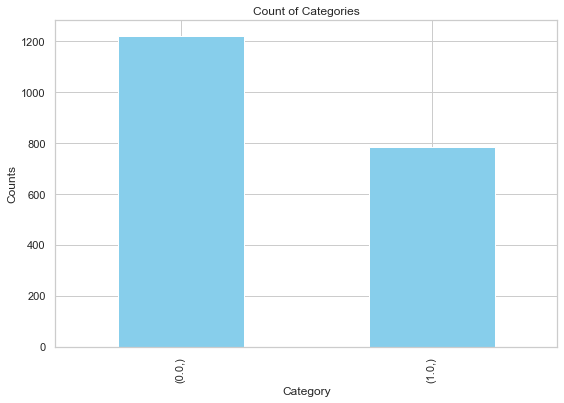

In [19]:
plt.figure(figsize=(9, 6))

y.value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Count of Categories')

In [20]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

### Տվյալները բալանսավորված չեն(imbalanced), հետևաբար ես կարիք ունեմ undersample-ի կամ oversample-ի

#### Undersampling

In [21]:
# split data to the classes
class_0 = df_train[df_train['label'] == 0]
class_1 = df_train[df_train['label'] == 1]

# making class 0 smaller and concat
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)
data_balanced = pd.concat([class_0_undersampled, class_1])

In [22]:
def remove_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


data_clean = remove_outliers_iqr(data_balanced)

X_train_clean = data_clean.drop(columns='label')
y_train_clean = data_clean['label']

In [23]:
X_train_clean.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10',
       'Feature 11', 'Feature 12'],
      dtype='object')

In [24]:
X_train_clean = X_train_clean.drop(['Feature 2', 'Feature 4'], axis=1)
df_test = df_test.drop(['Feature 2', 'Feature 4'], axis=1)

In [21]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)
y_train_clean = y_train_clean.reset_index(drop=True)

####  Feature 2 և 4-ը դուրս է մղվում, քանի որ ունեն բարձր կորելացիա մյուսների հետ

In [22]:
X_test_scaled = scaler.transform(df_test.drop(['label'], axis=1))

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_clean.columns)
y_test = df_test['label'].reset_index(drop=True)

In [43]:
def crVal(X_train,y_train,model, n_splits = 5):
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
  # Print cross-validation scores
  print("f1 scores scores for Cross-validation:", scores)
  print("f1 score for Mean cross-validation:", np.mean(scores))

In [23]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_clean)

predictions = LR.predict(X_test_scaled)

f1 = f1_score(y_test, predictions)
f"F1 Score for LogisticRegression: {f1}"

'F1 Score for LogisticRegression: 0.5914634146341463'

In [25]:
crVal(X_train_scaled, y_train_clean, LR)

f1 scores scores for Cross-validation: [0.725      0.71551724 0.68049793 0.64       0.69565217]
f1 score for Mean cross-validation: 0.6913334681207115


In [26]:
RF = RandomForestClassifier(random_state=42, min_samples_split=12, max_depth=10, n_estimators=500)
RF.fit(X_train_scaled, y_train_clean)

predictions = RF.predict(X_test_scaled)

f1 = f1_score(y_test, predictions)
f"F1 Score for RandomForest: {f1}"

'F1 Score for RandomForest: 0.8248175182481752'

In [27]:
crVal(X_train_scaled, y_train_clean, RF)

f1 scores scores for Cross-validation: [0.87892377 0.85844749 0.87445887 0.83928571 0.90666667]
f1 score for Mean cross-validation: 0.8715565021623748


In [28]:
DT = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 25, 30],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 7]
}
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train_clean)

# Get the best model from grid search
best_dt = grid_search.best_estimator_
predictions = best_dt.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
f'F1 Score for Decision Tree: {f1}'

'F1 Score for Decision Tree: 0.7576791808873721'

In [29]:
crVal(X_train_scaled, y_train_clean, DT)

f1 scores scores for Cross-validation: [0.80717489 0.78538813 0.78632479 0.8209607  0.83982684]
f1 score for Mean cross-validation: 0.8079350681175681


In [30]:
MLP = MLPClassifier(random_state=42, max_iter=500)

# Perform grid search to tune hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(estimator=MLP, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_clean)

best_mlp = grid_search.best_estimator_
predictions = best_mlp.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
f'F1 Score for Neural Network: {f1}'

c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


'F1 Score for Neural Network: 0.7847222222222223'

In [31]:
crVal(X_train_scaled, y_train_clean, MLP)

c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


f1 scores scores for Cross-validation: [0.84166667 0.79475983 0.81196581 0.76923077 0.84482759]
f1 score for Mean cross-validation: 0.8124901318795311


c:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Oversampling

In [25]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [26]:
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(df_train.drop('label', axis=1), df_train['label'])

In [27]:
df_X_train_smote = pd.DataFrame(X_train_smote, columns=df_train.drop('label', axis=1).columns)
df_y_train_smote = pd.DataFrame(y_train_smote, columns=['label'])

df_train_smote = pd.concat([df_X_train_smote, df_y_train_smote], axis=1)

In [28]:
clean_data = remove_outliers_iqr(df_train_smote)

X_train_clean = clean_data.drop(columns='label')
y_train_clean = clean_data['label']

In [29]:
X_train_clean = X_train_clean.drop(['Feature 2', 'Feature 4'], axis=1)
df_test = df_test.drop(['Feature 2', 'Feature 4'], axis=1)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)
y_train_clean = y_train_clean.reset_index(drop=True)

In [31]:
X_test_scaled = scaler.transform(df_test.drop(['label'], axis=1))

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_clean.columns)
y_test = df_test['label'].reset_index(drop=True)

In [32]:
rf = RandomForestClassifier(random_state=42, min_samples_split=12, max_depth=12, n_estimators=800)

rf.fit(X_train_scaled, y_train_clean)

predictions = rf.predict(X_test_scaled)

f1 = f1_score(y_test, predictions)
f"F1 Score for RandomForest: {f1}"

'F1 Score for RandomForest: 0.8778625954198472'

In [33]:
crVal(X_train_scaled, y_train_clean, rf)

NameError: name 'crVal' is not defined

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 25, 30],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 7]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train_clean)

# Get the best model from grid search
best_dt = grid_search.best_estimator_
predictions = best_dt.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
f'F1 Score for Decision Tree: {f1}'

'F1 Score for Decision Tree: 0.7342657342657342'

In [42]:
crVal(X_train_scaled, y_train_clean, dt)

f1 scores scores for Cross-validation: [0.82035928 0.84307692 0.82697947 0.82066869 0.86455331]
f1 score for Mean cross-validation: 0.8351275367569935


In [34]:
column_names = [f'Feature {i}' for i in range(1, 13)]

X = pd.read_csv('X_test.csv', names=column_names)
y = pd.read_csv('y_test.csv', names=['label'])

In [40]:
X_test_clean = X.drop(['Feature 2', 'Feature 4'], axis=1)
x = scaler.transform(X_test_clean)


In [41]:
predictions = rf.predict(x)

f1 = f1_score(y, predictions)
f"F1 Score for RandomForest: {f1}"

c:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'F1 Score for RandomForest: 0.8484848484848485'

#### Thanks